In [1]:
import torch

**Task - 1 start**

In [2]:
start = 0
end = 100
step = 0.1
data = torch.arange(start, end , step).unsqueeze(dim=1)


In [3]:
data.ndim, data.shape

(2, torch.Size([1000, 1]))

In [4]:
## Y = MX+C
slope = 0.3
intercept = 0.9
Y = slope*data+intercept

In [5]:
# Y[:10], Y[10:]
split_factor = 0.8
split_mark = int(split_factor * len(data))
print(split_mark)
X_train = data[:split_mark]
X_test = data[split_mark:]
y_pred = Y[:split_mark]
y_test = Y[split_mark:]


800


In [6]:
len(X_train),len(X_test),len(y_pred),len(y_test)

(800, 200, 800, 200)

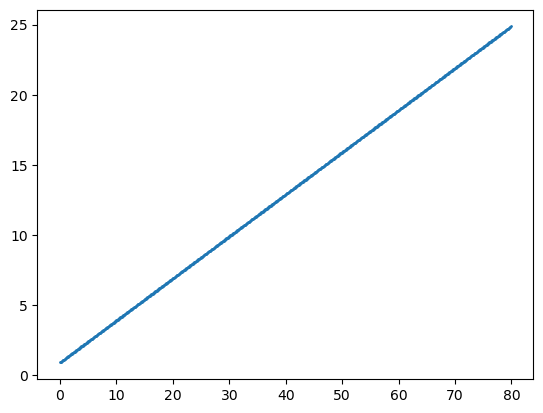

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_pred, s=1)
plt.show()

**Task -1 End**

**Task-2 Start**

In [8]:
from torch import nn

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**"Building The Regression Model BluePrint"**

In [10]:
# layer_1 = nn.Linear(in_features=1 , out_features=2)

# class LinearRegressionTest(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.LinearLayer = nn.Linear(in_features = 1, out_features=1)
        
#     def forward(self,x:torch.Tensor) -> torch.Tensor:
#         return self.LinearLayer(x)
    

    
class LinearRegressionTest(nn.Module):
    def __init__(self):
        super().__init__()
        
        ## Weights
        self.weight = nn.Parameter(data = torch.randn(1, requires_grad=True,
                                                     dtype = torch.float32))
        
        ##Bias
        self.bias = nn.Parameter(data = torch.randn(1, requires_grad=True,
                                                   dtype = torch.float32))
        
    
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

        
            
    
    
    
    
    


In [11]:
torch.manual_seed(43)
model = LinearRegressionTest()
model, model.state_dict()

(LinearRegressionTest(),
 OrderedDict([('weight', tensor([-0.6484])), ('bias', tensor([-0.7058]))]))

In [12]:
# next(model.parameters()).device

In [13]:
model.to(device)
list(model.parameters())

[Parameter containing:
 tensor([-0.6484], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.7058], device='cuda:0', requires_grad=True)]

In [14]:
##lets define our loss function scheme
loss_fn = nn.L1Loss()
## and an optimizer as well
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

**"Remember the basic steps for the training" 
1-> forward Pass
2-> calculate error
3-> set gradient to zero
4-> calculate gradient
5-> backward propagation i.e. update the optimizer
**

In [15]:
##Lets start the training loop
torch.manual_seed(43)


epochs = 3000
## Load the dataset into GPU
# X.to(device)
Y.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)

y_pred = y_pred.to(device)
y_test = y_test.to(device)



for epoch in range(epochs):
    
    ## put model into GPU
    model.to(device)
    
    
    ## forward pass
    preds = model(X_train)
    
    ##calculate loss
    loss = loss_fn(preds, y_pred)
    
    ## set grad to 0
    optimizer.zero_grad()
    
    ## backprop/ calc gradient
    loss.backward()
    
    ## update the optimizer
    optimizer.step()
    
    ## model evaluation
    model.eval()
    
    with torch.inference_mode():
        ## forward pass
        test_pred = model(X_test)
        ##loss calculation
        test_loss = loss_fn(test_pred, y_test)
        ## thats it
    
    
    
    ## performance monitoring
    if epoch%10==0:
        print(f"Epoch: {epoch}|| train_loss: {loss} ||test_loss: {test_loss}")
        
    


Epoch: 0|| train_loss: 39.49446105957031 ||test_loss: 50.96949768066406
Epoch: 10|| train_loss: 6.7984843254089355 ||test_loss: 22.614852905273438
Epoch: 20|| train_loss: 5.993862152099609 ||test_loss: 24.417593002319336
Epoch: 30|| train_loss: 5.288267612457275 ||test_loss: 25.99793243408203
Epoch: 40|| train_loss: 4.665167331695557 ||test_loss: 27.393024444580078
Epoch: 50|| train_loss: 4.100496768951416 ||test_loss: 28.656938552856445
Epoch: 60|| train_loss: 3.5869357585906982 ||test_loss: 29.806119918823242
Epoch: 70|| train_loss: 3.1089305877685547 ||test_loss: 30.8754940032959
Epoch: 80|| train_loss: 2.665282726287842 ||test_loss: 31.867767333984375
Epoch: 90|| train_loss: 2.2465438842773438 ||test_loss: 32.80413818359375
Epoch: 100|| train_loss: 1.855946660041809 ||test_loss: 33.6773681640625
Epoch: 110|| train_loss: 1.4848519563674927 ||test_loss: 34.5068359375
Epoch: 120|| train_loss: 1.1290405988693237 ||test_loss: 35.302024841308594
Epoch: 130|| train_loss: 0.791833937168121

In [16]:
## now that the training is over
## Lets check the Predictions

model.eval()

with torch.inference_mode():
    fx = model(X_test)
fx


tensor([[24.1122],
        [24.1420],
        [24.1717],
        [24.2015],
        [24.2313],
        [24.2610],
        [24.2908],
        [24.3205],
        [24.3503],
        [24.3801],
        [24.4098],
        [24.4396],
        [24.4694],
        [24.4991],
        [24.5289],
        [24.5586],
        [24.5884],
        [24.6182],
        [24.6479],
        [24.6777],
        [24.7074],
        [24.7372],
        [24.7670],
        [24.7967],
        [24.8265],
        [24.8562],
        [24.8860],
        [24.9158],
        [24.9455],
        [24.9753],
        [25.0050],
        [25.0348],
        [25.0646],
        [25.0943],
        [25.1241],
        [25.1539],
        [25.1836],
        [25.2134],
        [25.2431],
        [25.2729],
        [25.3027],
        [25.3324],
        [25.3622],
        [25.3919],
        [25.4217],
        [25.4515],
        [25.4812],
        [25.5110],
        [25.5407],
        [25.5705],
        [25.6003],
        [25.6300],
        [25.

In [17]:
## lets save the model
from pathlib import Path

##  first create the model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

## second create model path save
MODEL_NAME = 'test.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

## Thirdly save the model
torch.save(obj=model.state_dict, f = MODEL_SAVE_PATH)

In [18]:
##HOORAY###